In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from math import *


T=2.0 #longeur intervale du temps [0,1]  t0,t1,tn,t(M+1)
L=1.0 #Longueu intervale X [0,1] x0,x1,xi,x(N+1)

N=19 # const 
M=4999 #const 

delta_x=L/(N+1) # une subdivision de L
delta_t=T/(M+1) # une subdivision de T
t=np.linspace(0,T,M+2) # discretisation sur l'interval 0,T par M+2
X=np.linspace(0,L,N+2) # discretisation sur l'interval 0,L par N+2

Surx,Surt=np.meshgrid(X,t) #creation de mon ensemble de dimension

u=np.zeros((M+2,N+2)) #creation de la grille de taille M+2,N+2  , qui aura les valeurs.


In [2]:
def condition_init(x):
    f=(x-1)**2
    return f


On initialise la matrice U pour lui faire entrer les valeurs des conditions initial et limites.

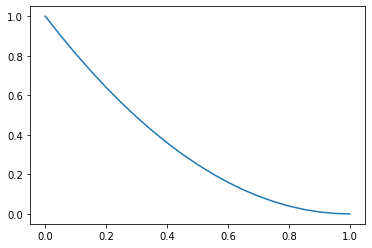

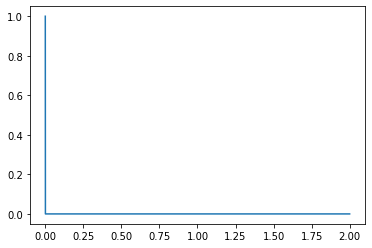

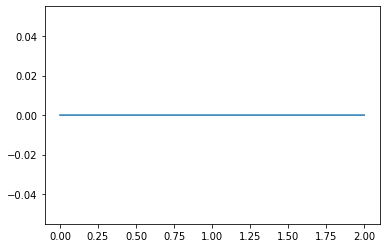

In [3]:

for i in range(0,N+2):
    u[0,i]=condition_init(X[i])

plt.plot(X,u[0,:])
plt.show()



plt.plot(t,u[:,0])
plt.show()



plt.plot(t,u[:,N+1])
plt.show()

On initialise a matrice en lui inserant l'ensemble des valeurs.

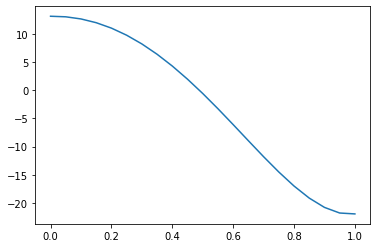

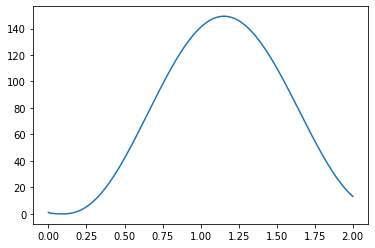

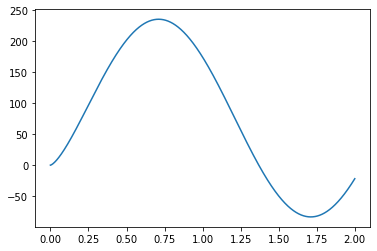

In [4]:

for i in range(0,M+1):
    for j in range(1,N+1):
        #u[i+1,j]=(delta_t/(delta_x**2))*(u[i,j+1]-u[i,j-1]-2*u[i,j])*(delta_t/delta_x)*(u[i,j+1]-u[i,j])+t[i]*cos(pi*X[j])*delta_x+u[i,j]
        u[i+1,j]=(delta_t/(delta_x*delta_x))*(u[i,j+1]+u[i,j-1]-2*u[i,j])- (delta_t/delta_x)*(u[i,j+1]-u[i,j])+t[i]*cos(pi*X[j])*delta_t+u[i,j]
        u[i+1,0]=u[i+1,1]+delta_x*(2*t[i]-2)
        u[i+1,N+1]=u[i,N]+20*sin(pi*t[i])
plt.plot(X,u[M+1,:])
plt.show()

plt.plot(t,u[:,0])
plt.show()



plt.plot(t,u[:,N+1])
plt.show()



On affiche en 3D le résultat de l'ensemble du programme.

<ipython-input-5-87328504a71c>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


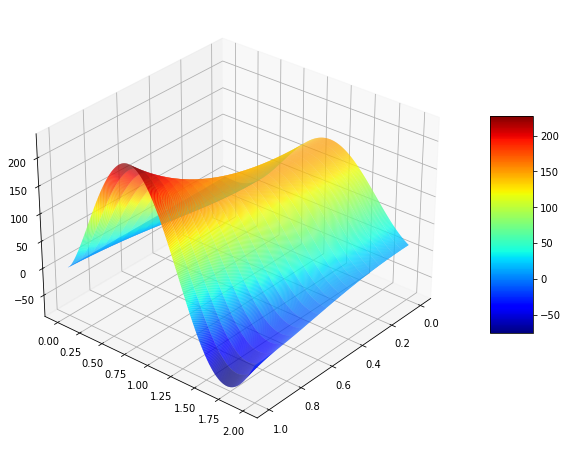

In [5]:
fig=plt.figure(figsize=(14,8)) 
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Surx,Surt,u,cstride=1,linewidth=0, cmap='jet')
for angle in range(0, 360):
 ax.view_init(30, 40)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()